<a href="https://colab.research.google.com/github/ttderessa/Temesgen-Deressa/blob/main/Hotelling's_Hamiltonian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🔬 HAMILTONIAN APPROACH TO OPTIMAL RESOURCE EXTRACTION
=== BASIC HOTELLING RULE ===
Fundamental Principle: dP/dt = r × P
With r = 5.0% interest rate
Initial price: $50


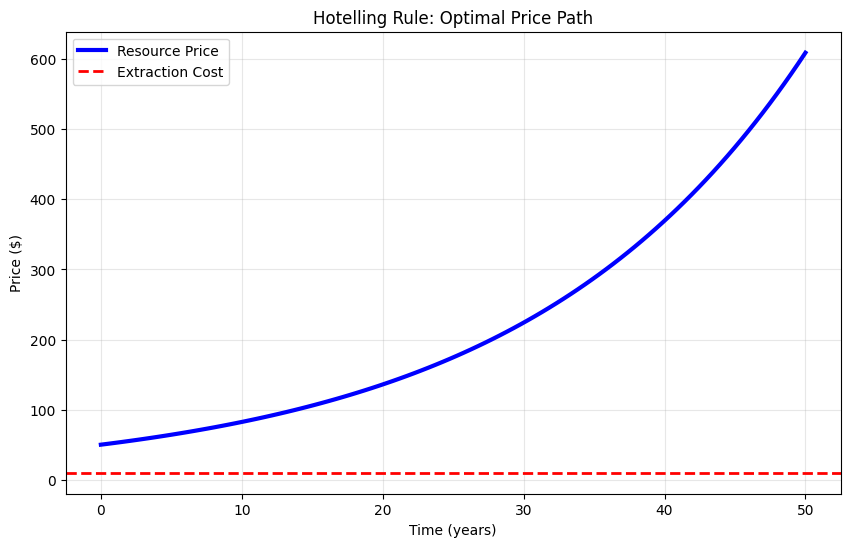

Price after 50 years: $609.12
Growth factor: 12.18x

=== HAMILTONIAN DERIVATION ===
Current-Value Hamiltonian:
H = -λ*q(t) + (-c + P(t))*q(t)

Where:
  [P(t) - c]·q(t) = Current net revenue
  λ(t)·(-q(t)) = Shadow value of stock reduction

First-Order Conditions:
1. ∂H/∂q = 0 → P - c - λ = 0
2. dλ/dt = r·λ - ∂H/∂S
3. dS/dt = -q

This leads to Hotelling's rule: d(P-c)/dt = r·(P-c)

=== OPTIMAL EXTRACTION PATH ===


/tmp/ipython-input-4269080587.py:102: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  total_extracted = np.trapz(q_path, time)


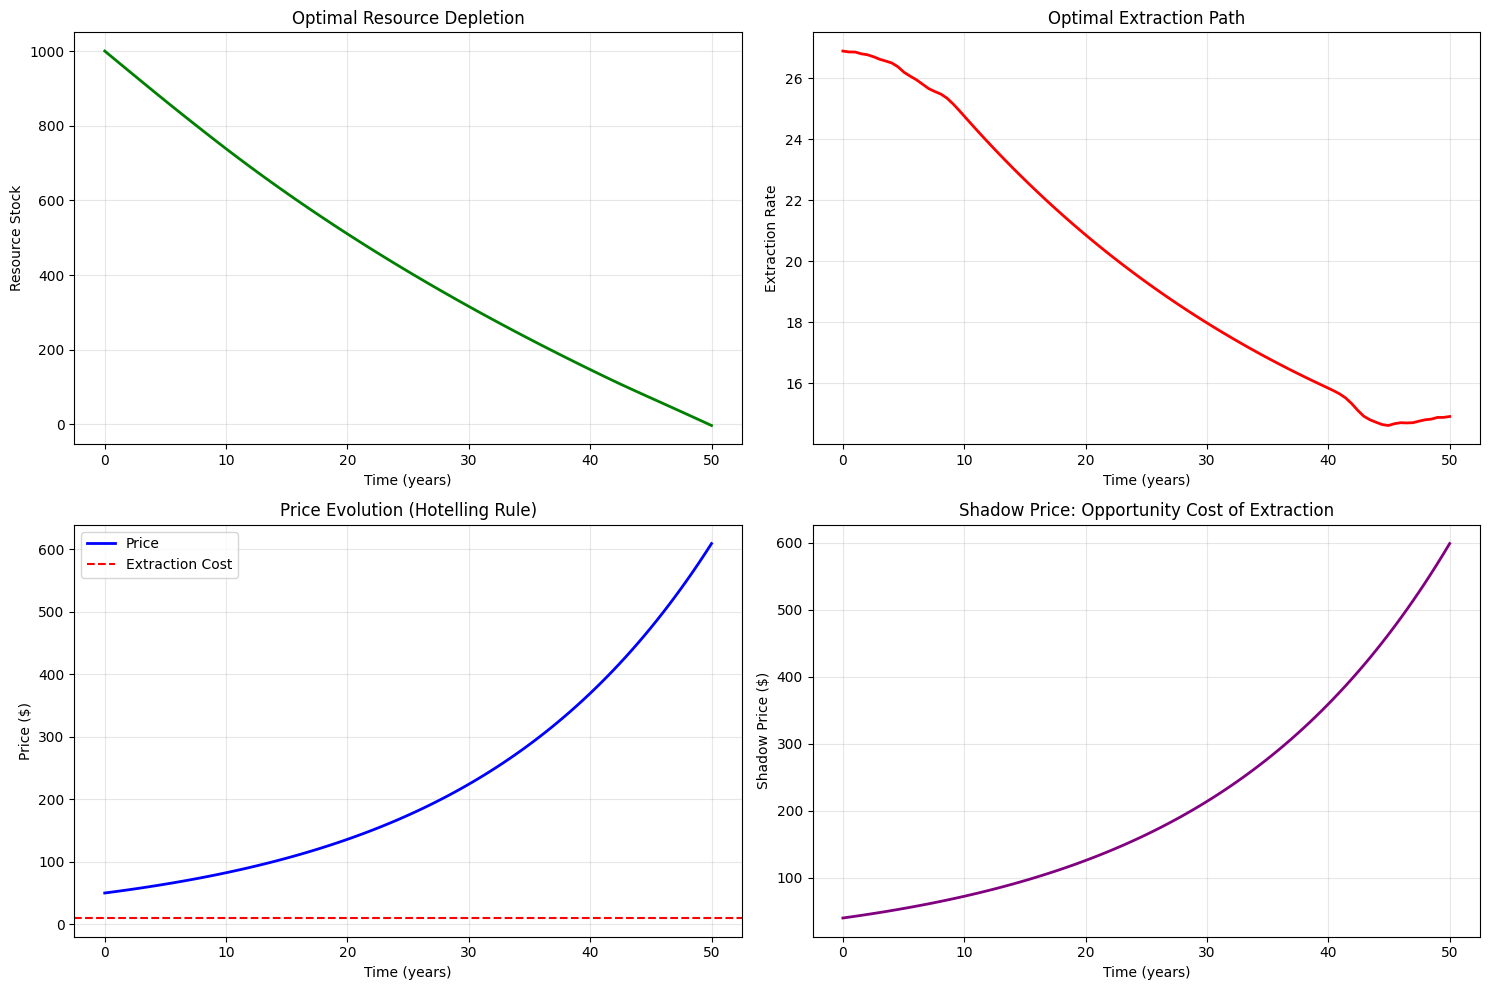

/tmp/ipython-input-4269080587.py:170: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  total_extracted = np.trapz(self.results['extraction'], self.results['time'])


Initial stock: 1000 units
Total extracted: 1000.0 units
Extraction period: 50 years
Final stock: -3.0 units

=== EXTENDED MODEL: STOCK-DEPENDENT COSTS ===


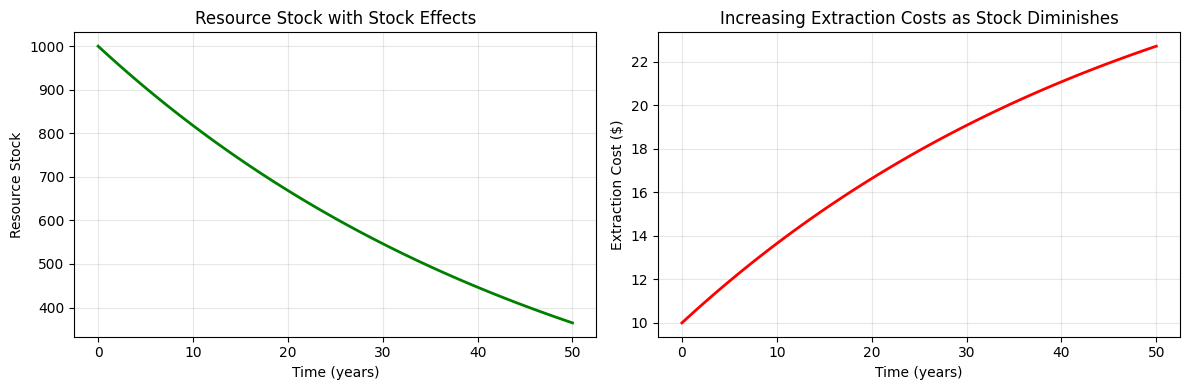

With stock-dependent costs:
- Extraction becomes more expensive over time
- Optimal path may accelerate initial extraction
- Hamiltonian includes cost gradient ∂c/∂S

=== POLICY ANALYSIS: 10.0% EXTRACTION TAX ===


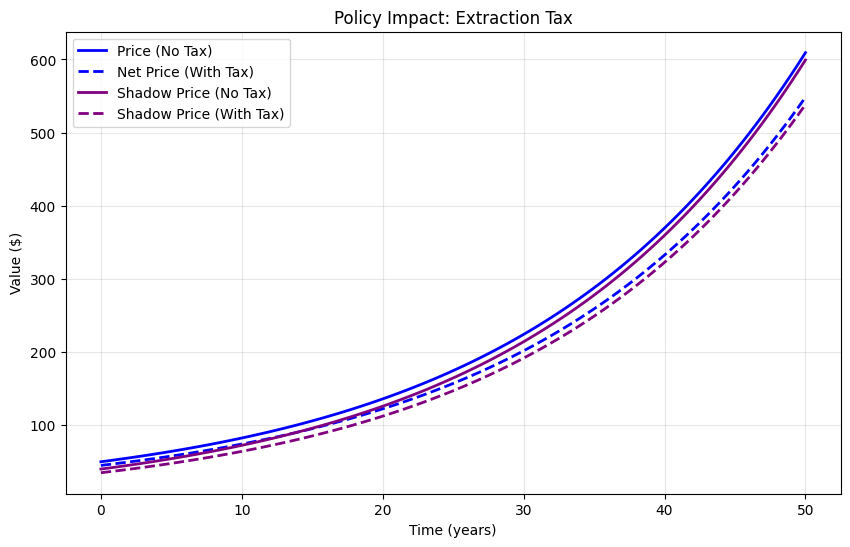

Tax effects:
- Reduces net price received by extractors
- May slow extraction rate initially
- Changes the Hamiltonian: H = [P(1-τ) - c]·q + λ·(-q)
- Can be used to correct for environmental externalities

📊 KEY ECONOMIC INSIGHTS:
• Resources should be priced to grow at the interest rate
• Shadow price captures opportunity cost of extraction
• Optimal path balances current profits vs future scarcity
• Stock effects and policies modify the basic Hotelling rule
• Hamiltonian provides rigorous framework for dynamic optimization


In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import sympy as sp

class HotellingResourceModel:
    """
    Comprehensive implementation of Hotelling's model for optimal resource extraction
    using Hamiltonian optimal control theory
    """

    def __init__(self, S0=1000, P0=50, r=0.05, c=10, T=50):
        # Model parameters
        self.S0 = S0      # Initial resource stock
        self.P0 = P0      # Initial resource price
        self.r = r        # Interest rate
        self.c = c        # Extraction cost
        self.T = T        # Time horizon

        # Results storage
        self.results = {}

    def basic_hotelling_rule(self):
        """Demonstrate the basic Hotelling rule: price grows at interest rate"""
        print("=== BASIC HOTELLING RULE ===")
        print("Fundamental Principle: dP/dt = r × P")
        print(f"With r = {self.r*100}% interest rate")
        print(f"Initial price: ${self.P0}")

        # Calculate price path
        time = np.linspace(0, self.T, 100)
        price_path = self.P0 * np.exp(self.r * time)

        # Plot results
        plt.figure(figsize=(10, 6))
        plt.plot(time, price_path, 'b-', linewidth=3, label='Resource Price')
        plt.axhline(y=self.c, color='r', linestyle='--', linewidth=2, label='Extraction Cost')
        plt.xlabel('Time (years)')
        plt.ylabel('Price ($)')
        plt.title('Hotelling Rule: Optimal Price Path')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()

        print(f"Price after {self.T} years: ${price_path[-1]:.2f}")
        print(f"Growth factor: {np.exp(self.r * self.T):.2f}x")

        return time, price_path

    def hamiltonian_derivation(self):
        """Show the mathematical derivation using Hamiltonian"""
        print("\n=== HAMILTONIAN DERIVATION ===")

        # Symbolic derivation
        S, λ, t, r, c = sp.symbols('S λ t r c')
        P = sp.Function('P')(t)
        q = sp.Function('q')(t)

        # Define Hamiltonian
        H = (P - c) * q + λ * (-q)

        print("Current-Value Hamiltonian:")
        print(f"H = {H}")
        print("\nWhere:")
        print("  [P(t) - c]·q(t) = Current net revenue")
        print("  λ(t)·(-q(t)) = Shadow value of stock reduction")

        print("\nFirst-Order Conditions:")
        print("1. ∂H/∂q = 0 → P - c - λ = 0")
        print("2. dλ/dt = r·λ - ∂H/∂S")
        print("3. dS/dt = -q")

        print("\nThis leads to Hotelling's rule: d(P-c)/dt = r·(P-c)")

        return H

    def optimal_extraction_path(self):
        """Calculate optimal extraction path using Hamiltonian approach"""
        print("\n=== OPTIMAL EXTRACTION PATH ===")

        # Time grid
        time = np.linspace(0, self.T, 100)
        dt = time[1] - time[0]

        # Pre-allocate arrays
        S = np.zeros_like(time)  # Resource stock
        P = np.zeros_like(time)  # Resource price
        q = np.zeros_like(time)  # Extraction rate
        λ = np.zeros_like(time)  # Shadow price

        # Initial conditions
        S[0] = self.S0
        P[0] = self.P0
        λ[0] = self.P0 - self.c  # Initial shadow price

        # Hotelling price path
        P = self.P0 * np.exp(self.r * time)
        λ = P - self.c

        # Solve for extraction path that exhausts resource exactly at T
        def objective(q_path):
            total_extracted = np.trapz(q_path, time)
            return (total_extracted - self.S0) ** 2 + 0.01 * np.sum(np.diff(q_path) ** 2)  # Smoothness penalty

        # Initial guess (declining extraction)
        q_guess = (self.S0 / self.T) * np.exp(-0.03 * time)

        # Constraints: non-negative extraction
        bounds = [(0, self.S0)] * len(time)

        # Optimize
        result = minimize(objective, q_guess, bounds=bounds, method='L-BFGS-B')
        q_opt = result.x

        # Calculate stock path
        for i in range(1, len(time)):
            S[i] = S[i-1] - q_opt[i-1] * dt

        # Store results
        self.results = {
            'time': time,
            'stock': S,
            'price': P,
            'extraction': q_opt,
            'shadow_price': λ
        }

        self._plot_optimal_path()

        return self.results

    def _plot_optimal_path(self):
        """Plot the optimal extraction path results"""
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

        # Plot 1: Resource stock
        ax1.plot(self.results['time'], self.results['stock'], 'g-', linewidth=2)
        ax1.set_xlabel('Time (years)')
        ax1.set_ylabel('Resource Stock')
        ax1.set_title('Optimal Resource Depletion')
        ax1.grid(True, alpha=0.3)

        # Plot 2: Extraction path
        ax2.plot(self.results['time'], self.results['extraction'], 'r-', linewidth=2)
        ax2.set_xlabel('Time (years)')
        ax2.set_ylabel('Extraction Rate')
        ax2.set_title('Optimal Extraction Path')
        ax2.grid(True, alpha=0.3)

        # Plot 3: Price evolution
        ax3.plot(self.results['time'], self.results['price'], 'b-', linewidth=2, label='Price')
        ax3.axhline(y=self.c, color='r', linestyle='--', label='Extraction Cost')
        ax3.set_xlabel('Time (years)')
        ax3.set_ylabel('Price ($)')
        ax3.set_title('Price Evolution (Hotelling Rule)')
        ax3.legend()
        ax3.grid(True, alpha=0.3)

        # Plot 4: Shadow price
        ax4.plot(self.results['time'], self.results['shadow_price'], 'purple', linewidth=2)
        ax4.set_xlabel('Time (years)')
        ax4.set_ylabel('Shadow Price ($)')
        ax4.set_title('Shadow Price: Opportunity Cost of Extraction')
        ax4.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

        # Print summary statistics
        total_extracted = np.trapz(self.results['extraction'], self.results['time'])
        print(f"Initial stock: {self.S0:.0f} units")
        print(f"Total extracted: {total_extracted:.1f} units")
        print(f"Extraction period: {self.T} years")
        print(f"Final stock: {self.results['stock'][-1]:.1f} units")

    def extended_model_stock_effects(self):
        """Extended model with stock-dependent extraction costs"""
        print("\n=== EXTENDED MODEL: STOCK-DEPENDENT COSTS ===")

        time = np.linspace(0, self.T, 100)

        # Stock-dependent cost: higher costs as stock decreases
        def extraction_cost(S):
            return self.c + 20 * (self.S0 - S) / self.S0

        # Solve extended model
        S_extended = np.zeros_like(time)
        cost_extended = np.zeros_like(time)

        S_extended[0] = self.S0
        cost_extended[0] = extraction_cost(S_extended[0])

        # Simple simulation
        extraction_rate = (self.S0 / self.T) * np.exp(-0.02 * time)

        for i in range(1, len(time)):
            dt = time[i] - time[i-1]
            S_extended[i] = S_extended[i-1] - extraction_rate[i-1] * dt
            cost_extended[i] = extraction_cost(S_extended[i])

        # Plot extended model
        plt.figure(figsize=(12, 4))

        plt.subplot(1, 2, 1)
        plt.plot(time, S_extended, 'g-', linewidth=2)
        plt.xlabel('Time (years)')
        plt.ylabel('Resource Stock')
        plt.title('Resource Stock with Stock Effects')
        plt.grid(True, alpha=0.3)

        plt.subplot(1, 2, 2)
        plt.plot(time, cost_extended, 'r-', linewidth=2)
        plt.xlabel('Time (years)')
        plt.ylabel('Extraction Cost ($)')
        plt.title('Increasing Extraction Costs as Stock Diminishes')
        plt.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

        print("With stock-dependent costs:")
        print("- Extraction becomes more expensive over time")
        print("- Optimal path may accelerate initial extraction")
        print("- Hamiltonian includes cost gradient ∂c/∂S")

    def policy_analysis(self, tax_rate=0.1):
        """Analyze effects of policy interventions"""
        print(f"\n=== POLICY ANALYSIS: {tax_rate*100}% EXTRACTION TAX ===")

        time = self.results['time']

        # With tax: effective price reduced
        price_with_tax = self.results['price'] * (1 - tax_rate)
        shadow_price_with_tax = np.maximum(price_with_tax - self.c, 0)

        # Compare paths
        plt.figure(figsize=(10, 6))

        plt.plot(time, self.results['price'], 'b-', linewidth=2, label='Price (No Tax)')
        plt.plot(time, price_with_tax, 'b--', linewidth=2, label='Net Price (With Tax)')
        plt.plot(time, self.results['shadow_price'], 'purple', linewidth=2, label='Shadow Price (No Tax)')
        plt.plot(time, shadow_price_with_tax, 'purple', linestyle='--', linewidth=2, label='Shadow Price (With Tax)')

        plt.xlabel('Time (years)')
        plt.ylabel('Value ($)')
        plt.title('Policy Impact: Extraction Tax')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()

        print("Tax effects:")
        print("- Reduces net price received by extractors")
        print("- May slow extraction rate initially")
        print("- Changes the Hamiltonian: H = [P(1-τ) - c]·q + λ·(-q)")
        print("- Can be used to correct for environmental externalities")

def run_complete_analysis():
    """Run the complete Hotelling model analysis"""
    print("🔬 HAMILTONIAN APPROACH TO OPTIMAL RESOURCE EXTRACTION")
    print("=" * 70)

    # Initialize model with realistic parameters
    model = HotellingResourceModel(
        S0=1000,    # 1000 units of resource
        P0=50,      # $50 initial price
        r=0.05,     # 5% interest rate
        c=10,       # $10 extraction cost
        T=50        # 50-year horizon
    )

    # Run analyses
    model.basic_hotelling_rule()
    model.hamiltonian_derivation()
    model.optimal_extraction_path()
    model.extended_model_stock_effects()
    model.policy_analysis(tax_rate=0.1)

    print("\n" + "=" * 70)
    print("📊 KEY ECONOMIC INSIGHTS:")
    print("• Resources should be priced to grow at the interest rate")
    print("• Shadow price captures opportunity cost of extraction")
    print("• Optimal path balances current profits vs future scarcity")
    print("• Stock effects and policies modify the basic Hotelling rule")
    print("• Hamiltonian provides rigorous framework for dynamic optimization")

# Run the complete analysis
if __name__ == "__main__":
    run_complete_analysis()